### BUILDING REGRESSION MLP USING SEQUENTIAL API

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
## fetch the data.
housing = fetch_california_housing()
housing.keys()
# housing.data
# housing.target
# housing.target_names
# housing.feature_names
# housing.DESCR
# columns = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
data = pd.DataFrame(housing.data, columns = housing.feature_names)
print(data.head())

## split the data to trainig and testing and validation sets.
print("============Splitting data to Training and Testing Sets===============")
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)
print("============Splitting data to Training and Validation Sets===============")
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print("=============scale the Data using the Standard Scaler================")
## initialize the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print("=============Model Development===========")
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),  ## X_train.shape[1:] -- (8,)
    keras.layers.Dense(1),
])
print(model.summary())

print("=============Compile the Model=================")
model.compile(
        loss = "mean_squared_error",
        optimizer = "sgd",
        metrics = "accuracy"
)
print("==============Train the Model with 20 Epochs==============")
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 200,
                    validation_data = (X_valid, y_valid),
)
print("================Evaluate the Model========================")
mse_test = model.evaluate(X_test, y_test)
print("================Predict the Model using New Data=====================")
X_new = X_test[:3]
y_pred = model.predict(X_new)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
============Splitting data to Training and Testing Sets===============
(15480, 8)
(5160, 8)
(15480,)
(5160,)
============Splitting data to Training and Validation Sets===============
(11610, 8)
(3870, 8)
(11610,)
(3870,)
=============scale the Data using the Standard Scaler================
=============Model Development===========
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Out

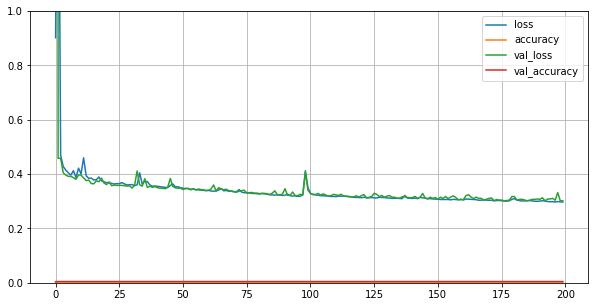

In [64]:
## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Here the Losses are Decreasing, but the Validation and Training accuracy is Very Low. Infact it is negligible.

+ I have trained the model for 200 epochs.
+ There is no change.
+ The model is not good enough.

***